Assignment 3

Daniel Scanks
V00788200

Q1: Lag correlations of weather time series

1) From the hourly time series at Deep Cove (dc), calculate the lag correlation co-efficient ρxx(τ) out to a lag of τ=30 days (Remember this data is hourly!). (also remember to remove the mean of dc before trying to do the calculations).
Comment on the resulting plot.


2) Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer). Make sure to indicate which lag correlation is which on the plots.
Comment below on the different charcter of these two lag correlations.

<IPython.core.display.Javascript object>


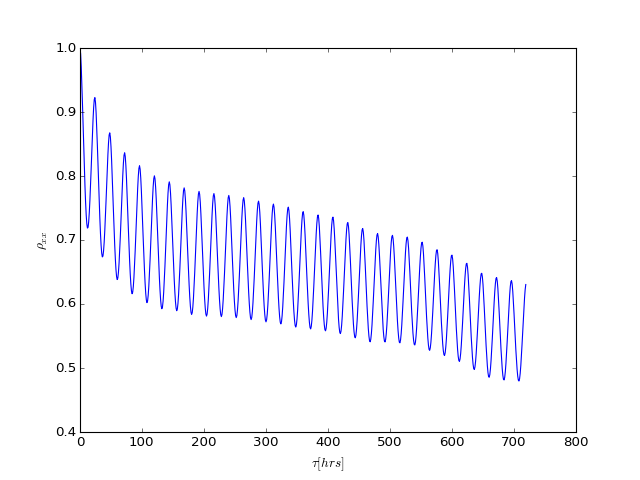

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
laghours = 30*24
dc = hourdata[0,:] 
dc= dc[~np.isnan(dc)] #to fix nan error on mean calculation
jb=hourdata[1,:]

                                        #1)
meandc = np.mean(dc)
dc = dc - meandc  #removing mean of dc
lag = range(0,laghours) # the lags are integer numbers of hours
cxx= meandc*np.array(lag)


for ind,tau in enumerate(lag):
    if tau==0:
        cxx[ind]=np.mean(dc*dc)
    else:
        cxx[ind]=np.mean(dc[:-tau]*dc[tau:])
                
pxx = cxx/(np.std(dc)*np.std(dc)) #lag correlation coefficient 


fig =plt.figure(figsize = (8,6))                     #can see that pxx(0)=1. overall (over 30 days) the lag correlation 
ax= fig.add_subplot(1,1,1)                           #coeff decreases over time. However, there is also a daily trend where the 
ax.plot(lag,pxx)                                     # correlation increases and decreases sharply and continously (wave pattern)
ax.set_xlabel(r'$\tau [hrs]$')                       # can say the trend is decreasing.
ax.set_ylabel(r'$\rho_{xx}$')


                                     #2)


